In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [70]:
df=pd.read_csv('laptop_data.csv')

In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [71]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

### Preprocessing and Feature Extraction

#### Memory column

In [6]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')


In [7]:
new = df["Memory"].str.split("+", n = 1, expand = True)
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [8]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()
df["first"]
df['second'] =new[1]

In [9]:
df['second']=df['second'].fillna('0')

In [10]:
df["1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)


In [11]:
df['first']=df['first'].str.split().apply(lambda x:x[0])

In [12]:
df["2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)

In [13]:
df['second']=df['second'].str.split().apply(lambda x:x[0])

In [14]:
df["first"] = df["first"].astype(float)
df["second"] = df["second"].astype(float)

In [15]:
df["HDD"]=(df["first"]*df["1HDD"]+df["second"]*df["2HDD"])
df["SSD"]=(df["first"]*df["1SSD"]+df["second"]*df["2SSD"])
df["Hybrid"]=(df["first"]*df["1Hybrid"]+df["second"]*df["2Hybrid"])
df["Flash_Storage"]=df["first"]*df["1Flash_Storage"]

In [16]:
df.drop(columns=['first', 'second', '1HDD', '1SSD', '1Hybrid',
       '1Flash_Storage', '2HDD', '2SSD', '2Hybrid','Hybrid','Flash_Storage'
       ],inplace=True)

In [17]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0.0,128.0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0.0,0.0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256 SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0.0,256.0


#### OpSys

In [18]:
def  os(type):
    if type == 'Windows 10' or type== 'Windows 7' or type == 'Windows 10 S':
        return 'Windows'
    elif type == 'macOS'  or  type == 'Mac OS X':
        return "Mac"
    else:
        return 'NoOS/Linux/Others'
    

In [19]:
df['OpSys']=df['OpSys'].apply(os)

In [20]:
df['OpSys'].value_counts()

Windows              1125
NoOS/Linux/Others     157
Mac                    21
Name: OpSys, dtype: int64

#### IPS Extraction

In [21]:
df['IPS']=df['ScreenResolution']

In [22]:
df['IPS']=df['IPS'].str.split()

In [23]:
def ips(ip):
    for i in ip:
        if i=='IPS':
            return True
        else:
            return False
df['IPS']=df['IPS'].apply(ips)

In [24]:
df['IPS'].value_counts()

False    938
True     365
Name: IPS, dtype: int64

#### Weight and Ram columns processing

In [25]:
df['Weight']=df['Weight'].str.replace('kg','').astype(float)

In [26]:
df['Ram']=df['Ram'].str.replace('GB','').astype(int)

In [27]:
df['Storage']=df['Memory']
df['Storage']=df['Storage'].str.split()
df['Storage']=df['Storage'].apply(lambda x: x[1])

#### memoSize

In [28]:
df['memoSize']=df['Memory'].str.split().apply(lambda x : x[0])

In [29]:
df['memoSize']=df['memoSize'].replace({'1TB':'1000GB'})
df['memoSize']=df['memoSize'].replace({'1.0TB':'1000GB'})
df['memoSize']=df['memoSize'].replace({'2TB':'2000GB'})

In [30]:
df['memoSize']=(df['memoSize'].str.replace('GB','')).astype(int)

#### Processor

In [31]:
df['Processor']=df['Cpu'].str.split()
df['Processor']=df['Processor'].apply(lambda x : x[0])



In [32]:
df['Processor'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: Processor, dtype: int64

In [33]:
df['TouchScreen']=df['ScreenResolution'].str.split()

In [34]:
df["ScreenResolution"]=df["ScreenResolution"].str.split().apply(lambda x : x[-1])

In [35]:
df['Gpu']=df['Gpu'].str.split().apply(lambda x :x[0])


In [36]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,HDD,SSD,IPS,Storage,memoSize,Processor,TouchScreen
0,0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel,Mac,1.37,71378.6832,0.0,128.0,True,SSD,128,Intel,"[IPS, Panel, Retina, Display, 2560x1600]"
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel,Mac,1.34,47895.5232,0.0,0.0,False,Flash,128,Intel,[1440x900]
2,2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel,NoOS/Linux/Others,1.86,30636.0000,0.0,256.0,False,SSD,256,Intel,"[Full, HD, 1920x1080]"


#### Touchscreen

In [37]:
def touch(scr):
    for i in scr:
        if i=='Touchscreen':
            return True
        else:
            return False

In [38]:
df['TouchScreen']=df['TouchScreen'].apply(touch)

In [39]:
df['TouchScreen'].value_counts()

False    1268
True       35
Name: TouchScreen, dtype: int64

In [40]:
df['TypeName']=df['TypeName'].replace({'2 in 1 Convertible':'Convertible'})

#### ppi

In [41]:
df[['res-x','reso-y']]= df['ScreenResolution'].str.split('x',expand=True)

In [42]:
df['reso-y']=df['reso-y'].astype(int)
df['res-x']=df['res-x'].astype(int)

In [43]:
y=df['reso-y']**2
x=df['res-x']**2
z=(x+y)**0.5

In [44]:
df['ppi'] = (z/df['Inches']).astype('float')

### EDA

c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

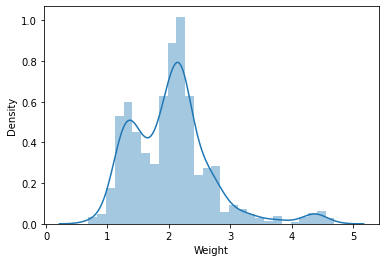

In [45]:
sns.distplot(df['Weight'])

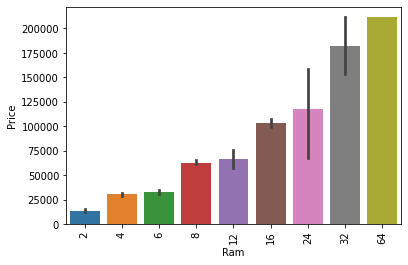

In [46]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


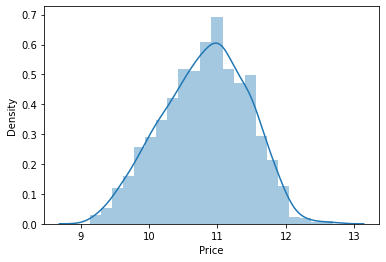

In [47]:
sns.distplot(np.log(df['Price']))
df['Price']=np.log(df['Price'])

c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Weight', ylabel='Price'>

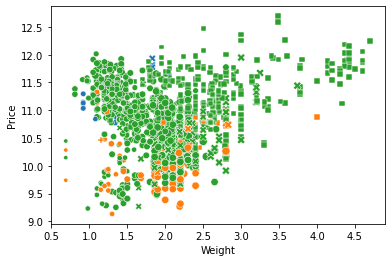

In [48]:
sns.scatterplot(df['Weight'],df['Price'],hue=df['OpSys'],style=df['Gpu'],size=df['Inches'],legend=False)

In [49]:
df['Ram'] = np.where(
    df['Ram']>30,
    24, df['Ram'])
    

In [50]:
df.corr()['Price']

Unnamed: 0     0.060598
Inches         0.044329
Ram            0.724381
Weight         0.151674
Price          1.000000
HDD           -0.092050
SSD            0.659663
IPS            0.281944
memoSize      -0.145304
TouchScreen    0.021993
res-x          0.552200
reso-y         0.549402
ppi            0.483129
Name: Price, dtype: float64

In [51]:
df.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,HDD,SSD,IPS,Storage,memoSize,Processor,TouchScreen,res-x,reso-y,ppi
0,0,Apple,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128 SSD,Intel,Mac,...,0.0,128.0,True,SSD,128,Intel,False,2560,1600,226.983005
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel,Mac,...,0.0,0.0,False,Flash,128,Intel,False,1440,900,127.677940
2,2,HP,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel,NoOS/Linux/Others,...,0.0,256.0,False,SSD,256,Intel,False,1920,1080,141.211998


Remove columns with little corr with price     
 Unnamed: 0,
Inches ,
HDD ,
memoSize ,
TouchScreen ,

In [52]:
df=df[[ 'Company', 'TypeName',  
        'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',  'SSD',
       'IPS',   'Processor', 'TouchScreen', 
       'ppi']]

In [53]:
df['Price']

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


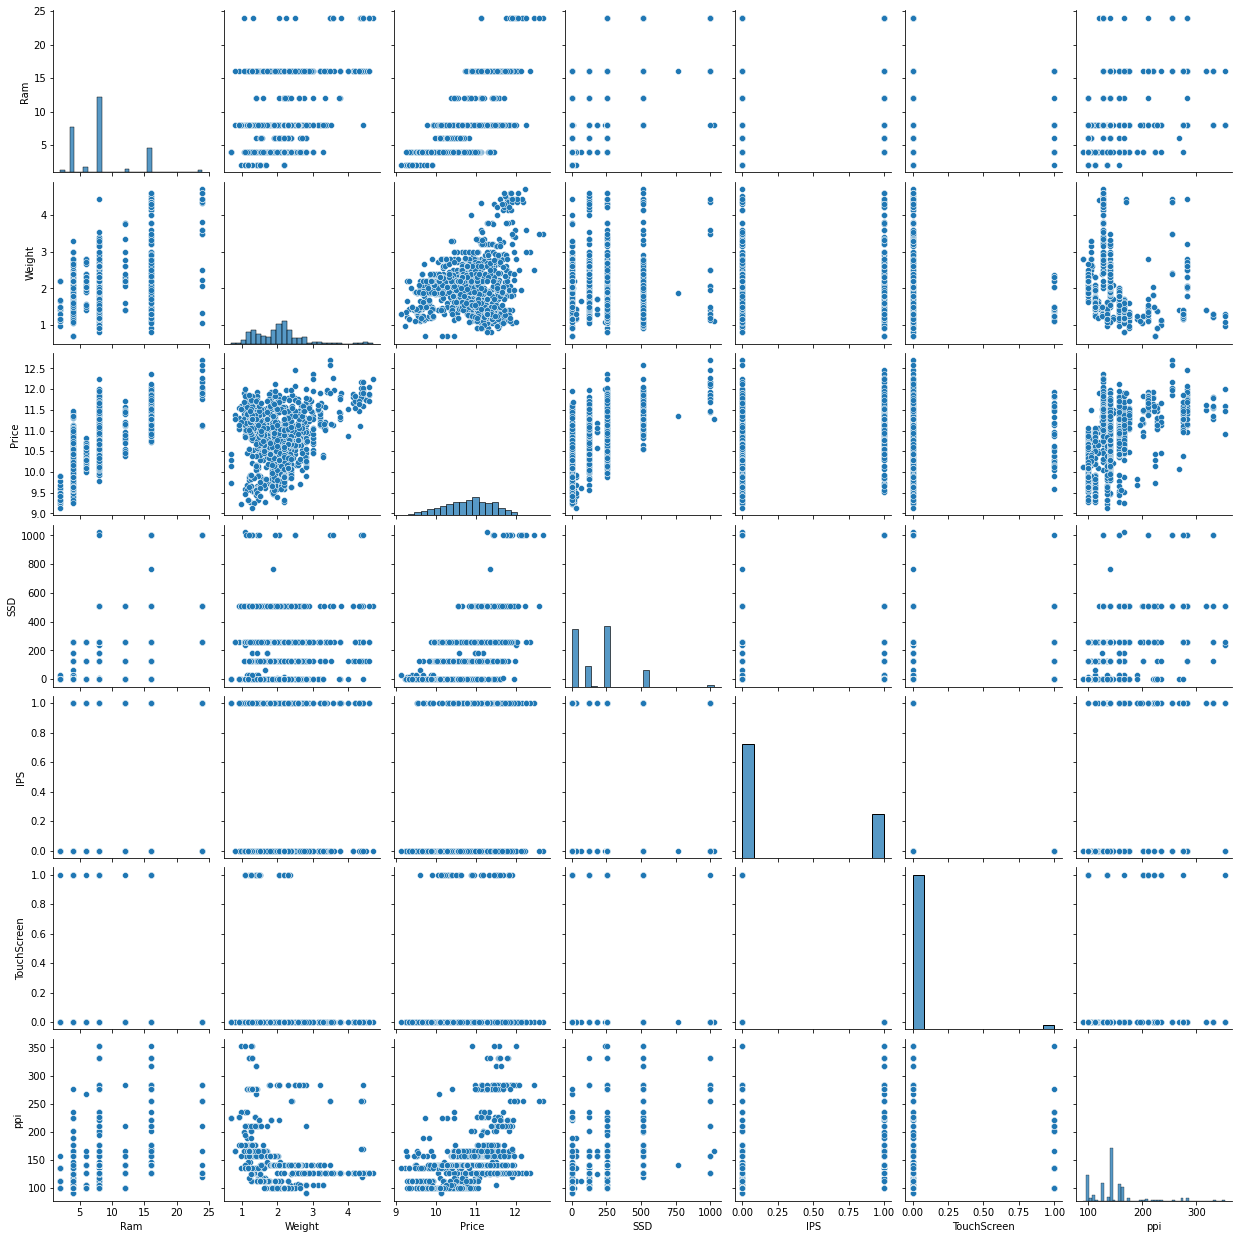

In [54]:
sns.pairplot(df)

In [55]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\pandas\core\strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\pandas\core\strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\pandas\core\strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
c:\Users\Nexgen\anaconda3\envs\machineLearning\lib\site-packages\pandas\core\strings.py:1541: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
df.head(3)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,SSD,IPS,Processor,TouchScreen,ppi
0,Apple,Ultrabook,8,Intel,Mac,1.37,11.175755,128.0,True,Intel,False,226.983005
1,Apple,Ultrabook,8,Intel,Mac,1.34,10.776777,0.0,False,Intel,False,127.677940
2,HP,Notebook,8,Intel,NoOS/Linux/Others,1.86,10.329931,256.0,False,Intel,False,141.211998


In [57]:
x = df.drop(columns=['Price'])
y = df['Price']

In [58]:
y


0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [59]:
df.corr()['Price']

Ram            0.724381
Weight         0.151674
Price          1.000000
SSD            0.659663
IPS            0.281944
TouchScreen    0.021993
ppi            0.483129
Name: Price, dtype: float64

### Model selection

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor

Linear regression pipeline

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 183 to 1192
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1107 non-null   object 
 1   TypeName     1107 non-null   object 
 2   Ram          1107 non-null   int32  
 3   Gpu          1107 non-null   object 
 4   OpSys        1107 non-null   object 
 5   Weight       1107 non-null   float64
 6   SSD          1107 non-null   float64
 7   IPS          1107 non-null   bool   
 8   Processor    1107 non-null   object 
 9   TouchScreen  1107 non-null   bool   
 10  ppi          1107 non-null   float64
dtypes: bool(2), float64(3), int32(1), object(5)
memory usage: 84.3+ KB


In [63]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7527621573721157
MAE 0.2418175868045928


Lasso Regression

In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')

step2 = Lasso(alpha=0.000001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7527788697980868
MAE 0.24181174468121705


Ridge Regression

In [65]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7414242156405273
MAE 0.2522527637725758


KNN

In [66]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8104394249308323
MAE 0.206021866971423


Decision Tree

In [67]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=9)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7805187290759161
MAE 0.21142545881831837


SVM

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8233563715116217
MAE 0.21135223287758118


Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8548817173976451
MAE 0.1843633713213788


AdaBoost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.735244642902102
MAE 0.2551696851218545


Gradient Boost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8370334607202712
MAE 0.1956686551473696


Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt),  ('et',et)],weights=[5,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8519626181886232
MAE 0.18469793449680272


Stacking

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,8])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
  
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8299576146072225
MAE 0.1976134486922129


Compiling

In [77]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))